<a href="https://colab.research.google.com/github/Shahriar-Ferdoush/Business-Data-Analysis/blob/main/Business_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

In [32]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
path = "/content/drive/MyDrive/Colab Notebooks/Transaction_Naration_Data_Set.csv"
data = pd.read_csv(path)

data.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.0,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.0,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.0,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [34]:
df = data[['NARATION']]
df.head()

,NARATION
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from Micro Merchant point, MM A/C"
3,Credit Against Merchant Cash Withdraw Service ...
4,"Cash withdraw from Micro Merchant point, MM A/C"


In [35]:
len(df)

22546758

In [36]:
sample = df.sample(frac=0.005, random_state=42)
sample.head()

,NARATION
10644656,SMS Charge Deduction For The Year
1332548,Cash Withdrawal From A/C No.:
17201798,Cash Deposit to A/C No.:
17211406,Cash Deposit to A/C No.:
6028049,Cash Deposit


In [37]:
len(sample)

112734

In [38]:
import re

In [39]:
sample['NARATION'] = sample['NARATION'].str.replace('[^a-zA-Z ]', '')

<ipython-input-39-a419482d0df8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sample['NARATION'] = sample['NARATION'].str.replace('[^a-zA-Z ]', '')


In [40]:
sample.head()

,NARATION
10644656,SMS Charge Deduction For The Year
1332548,Cash Withdrawal From AC No
17201798,Cash Deposit to AC No
17211406,Cash Deposit to AC No
6028049,Cash Deposit


In [41]:
sample['NARATION'] = sample['NARATION'].str.lower()
sample.head()

,NARATION
10644656,sms charge deduction for the year
1332548,cash withdrawal from ac no
17201798,cash deposit to ac no
17211406,cash deposit to ac no
6028049,cash deposit


In [42]:
sample = sample.dropna(subset=['NARATION'])
sample.head()

,NARATION
10644656,sms charge deduction for the year
1332548,cash withdrawal from ac no
17201798,cash deposit to ac no
17211406,cash deposit to ac no
6028049,cash deposit


#Do Sample duplicate drop here

In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
sample['TOKENIZED'] = sample['NARATION'].apply(lambda x: nltk.word_tokenize(x))
sample.head()

,NARATION,TOKENIZED
10644656,sms charge deduction for the year,"[sms, charge, deduction, for, the, year]"
1332548,cash withdrawal from ac no,"[cash, withdrawal, from, ac, no]"
17201798,cash deposit to ac no,"[cash, deposit, to, ac, no]"
17211406,cash deposit to ac no,"[cash, deposit, to, ac, no]"
6028049,cash deposit,"[cash, deposit]"


In [45]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
lemmatizer = WordNetLemmatizer()

sample['TOKENIZED'] = sample['TOKENIZED'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [47]:
print(sample)

                                                NARATION  \
10644656              sms charge deduction for the year    
1332548                      cash withdrawal from ac no    
17201798                          cash deposit to ac no    
17211406                          cash deposit to ac no    
6028049                                     cash deposit   
...                                                  ...   
17766192                                   cash withdraw   
9016822                      cash withdrawal from ac no    
12930388                                   cash withdraw   
19510940  cash withdraw from micro merchant point mm ac    
15462653                     cash withdrawal from ac no    

                                                  TOKENIZED  
10644656            [sm, charge, deduction, for, the, year]  
1332548                    [cash, withdrawal, from, ac, no]  
17201798                        [cash, deposit, to, ac, no]  
17211406                       

#Stopword Removal

In [56]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
stopwords = set(stopwords.words('english'))

In [58]:
new_words = ['ac', 'no']
stopwords.update(new_words)

In [59]:
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

In [61]:
sample['TOKENIZED'] = sample['TOKENIZED'].apply(remove_stopwords)
sample.head()

,NARATION,TOKENIZED
10644656,sms charge deduction for the year,"[sm, charge, deduction, year]"
1332548,cash withdrawal from ac no,"[cash, withdrawal]"
17201798,cash deposit to ac no,"[cash, deposit]"
17211406,cash deposit to ac no,"[cash, deposit]"
6028049,cash deposit,"[cash, deposit]"


#Visualization

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
all_tokens = [token for sublist in sample['TOKENIZED'] for token in sublist]

token_counts = pd.Series(all_tokens).value_counts().reset_index()

token_counts.columns = ['Token', 'Frequency']
top_25_tokens = token_counts.head(25)

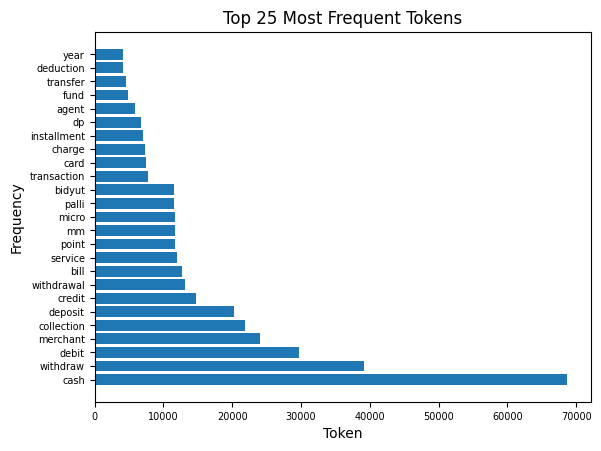

In [81]:
plt.barh(top_25_tokens['Token'], top_25_tokens['Frequency'])
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Top 25 Most Frequent Tokens')
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.show()

In [83]:
sample.head(100)

,NARATION,TOKENIZED
10644656,sms charge deduction for the year,"[sm, charge, deduction, year]"
1332548,cash withdrawal from ac no,"[cash, withdrawal]"
17201798,cash deposit to ac no,"[cash, deposit]"
17211406,cash deposit to ac no,"[cash, deposit]"
6028049,cash deposit,"[cash, deposit]"
...,...,...
19869157,cash deposit to ac no,"[cash, deposit]"
12108053,cash withdraw,"[cash, withdraw]"
12635694,cash withdraw from micro merchant point mm ac,"[cash, withdraw, micro, merchant, point, mm]"
20212321,credit against merchant cash withdraw service ...,"[credit, merchant, cash, withdraw, service]"


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [89]:
sample['TOKENIZED'] = sample['TOKENIZED'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample['TOKENIZED'].values.astype(str))

In [90]:
k = 14  # No of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14, random_state=42)

In [93]:
labels = kmeans.labels_

sample['Cluster'] = labels
sample.head()

,NARATION,TOKENIZED,Cluster
10644656,sms charge deduction for the year,sm charge deduction year,7
1332548,cash withdrawal from ac no,cash withdrawal,5
17201798,cash deposit to ac no,cash deposit,3
17211406,cash deposit to ac no,cash deposit,3
6028049,cash deposit,cash deposit,3
